In [3]:
#Imports:
import os
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

#DIRECTORIES:
datadir = 'data/'
figdir = 'figures/'

<ipython-input-38-a8ca3d152628>:32: RuntimeWarning: invalid value encountered in log10
  lgPA = np.log10(PA)


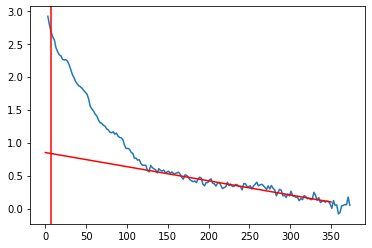

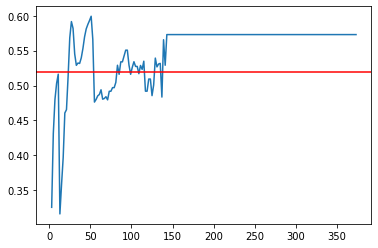

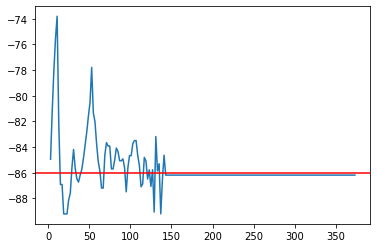

In [38]:
#Importing data:
data = np.loadtxt(datadir+'UGC09067_i.txt',skiprows=3)
r = np.array(data[:,0])
lgr = np.log10(r)

    #Intensity:
I = data[:,1]
lgI = np.log10(I)
plt.figure()
plt.plot(r,lgI)
plt.plot([0,350],[0.85,0.1],'r')
plt.axvline(7, color='r', linestyle='-')
#plt.xlim([0,100])
plt.savefig(figdir+'r_I.png',bbox_inches='tight',dpi=300)
r = r.flatten().tolist()
#pos = r.index(6)
#Io = I[pos]
#print(Io)

    #Ellipticity:
el = data[:,3]
#elo = el[pos]
#print(elo)
plt.figure()
plt.plot(r,el)
#plt.xlim([0,150])
plt.axhline(y=0.52, color='r', linestyle='-')
plt.savefig(figdir+'r_el.png',bbox_inches='tight',dpi=300)
    
    #PA:
PA = data[:,5]
lgPA = np.log10(PA)
#PAo = PA[pos]
#print(PAo)
plt.figure()
plt.plot(r,PA)
#plt.xlim([0,150])
plt.axhline(y=-86, color='r', linestyle='-')
plt.savefig(figdir+'r_pa.png',bbox_inches='tight',dpi=300)

<Figure size 432x288 with 0 Axes>

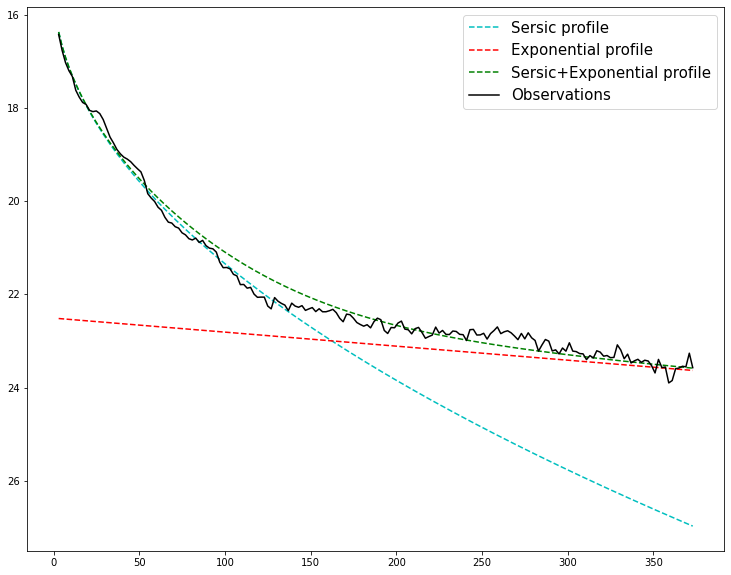

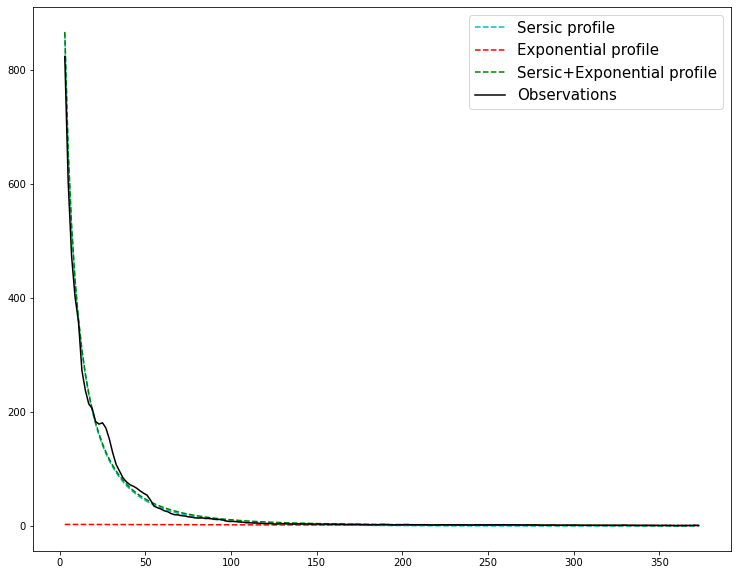

In [71]:
#REPRESENTING PROFILES:
    #Common variables:
zcal = 23.700399
r = np.array(data[:,0])

plt.figure()

    #Function defining:
def mu_exp(x,zcal,Ie,h):
    i = Ie*np.exp(-x/h)
    m = -2.5*np.log10(i)+zcal
    m = np.array(m,dtype='float64')
    return m,i

def mu_sers(x,zcal,Ie,bn,Re,n):
    i = Ie*np.exp(-bn*((x/Re)**(1/n)-1))
    m = -2.5*np.log10(i)+zcal
    m = np.array(m,dtype='float64')
    return m,i

    #Sersic data:
n = 2.00855
bn = 2*n-0.327
Ie = 56.265
Re = 47.3047
M_sers,I_sers = mu_sers(r,zcal,Ie,bn,Re,n)

    #Exp data:
h = 169.758
Ie = 100
M_exp,I_exp = mu_exp(r,zcal,Ie,h)

    #Combined:
n = 1.98836
bn = 2*n-0.327
Ie = 57.9656
Re = 43.7096
M_sers_c,I_sers_c = mu_sers(r,zcal,Ie,bn,Re,n)
Ie = 3
h = 360
M_exp_c,I_exp_c = mu_exp(r,zcal,Ie,h)

I_tot = I_exp_c+I_sers_c
M_tot = -2.5*np.log10(I_tot)+zcal
    
    #Data:
I = np.array(data[:,1])
M = -2.5*np.log10(I)+zcal

    #Plotting magnitude:
plt.figure(figsize=(12.5,10))
plt.plot(r,M_sers_c,'c--',label='Sersic profile')
plt.plot(r,M_exp_c,'r--',label='Exponential profile')
plt.plot(r,M_tot,'g--',label='Sersic+Exponential profile')
plt.plot(r,M,'k-',label='Observations')
plt.gca().invert_yaxis()
plt.legend(fontsize=15)
plt.savefig(figdir+'mu_exp_sersic.png',bbox_inches='tight',dpi=300)

    #Plotting intensity:
plt.figure(figsize=(12.5,10))
plt.plot(r,I_sers_c,'c--',label='Sersic profile')
plt.plot(r,I_exp_c,'r--',label='Exponential profile')
plt.plot(r,I_tot,'g--',label='Sersic+Exponential profile')
plt.plot(r,I,'k-',label='Observations')
plt.legend(fontsize=15)
plt.savefig(figdir+'I_exp_sersic.png',bbox_inches='tight',dpi=300)

In [1]:
0.894960/0.369

2.4253658536585365

In [25]:
10**0.85

7.079457843841379

In [18]:
7.08/2.71

2.6125461254612548

In [ ]:
Ie = 3
h = 360